In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df_diabetes = pd.read_csv(r'C:\Users\Bithi\Downloads\archive (3)\diabetes.csv')

In [3]:
X = df_diabetes.drop('Outcome', axis=1)
y = df_diabetes['Outcome']

In [4]:
num_records, num_features = df_diabetes.shape
print(f"Number of records: {num_records}")
print(f"Number of features: {num_features}")

Number of records: 768
Number of features: 9


In [5]:
print("Feature names:")
print(df_diabetes.columns)


Feature names:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [6]:
print("Number of records in each category of 'Outcome':")
print(df_diabetes['Outcome'].value_counts())


Number of records in each category of 'Outcome':
0    500
1    268
Name: Outcome, dtype: int64


In [7]:
print("Information about the dataframe:")
print(df_diabetes.info())

Information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [8]:
print("Numerical description of the dataframe:")
print(df_diabetes.describe())

Numerical description of the dataframe:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.4769

In [9]:
missing_values = df_diabetes.isnull().sum()
print("Missing values in each feature:")
print(missing_values)

Missing values in each feature:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
model_name = DecisionTreeClassifier(random_state=42)

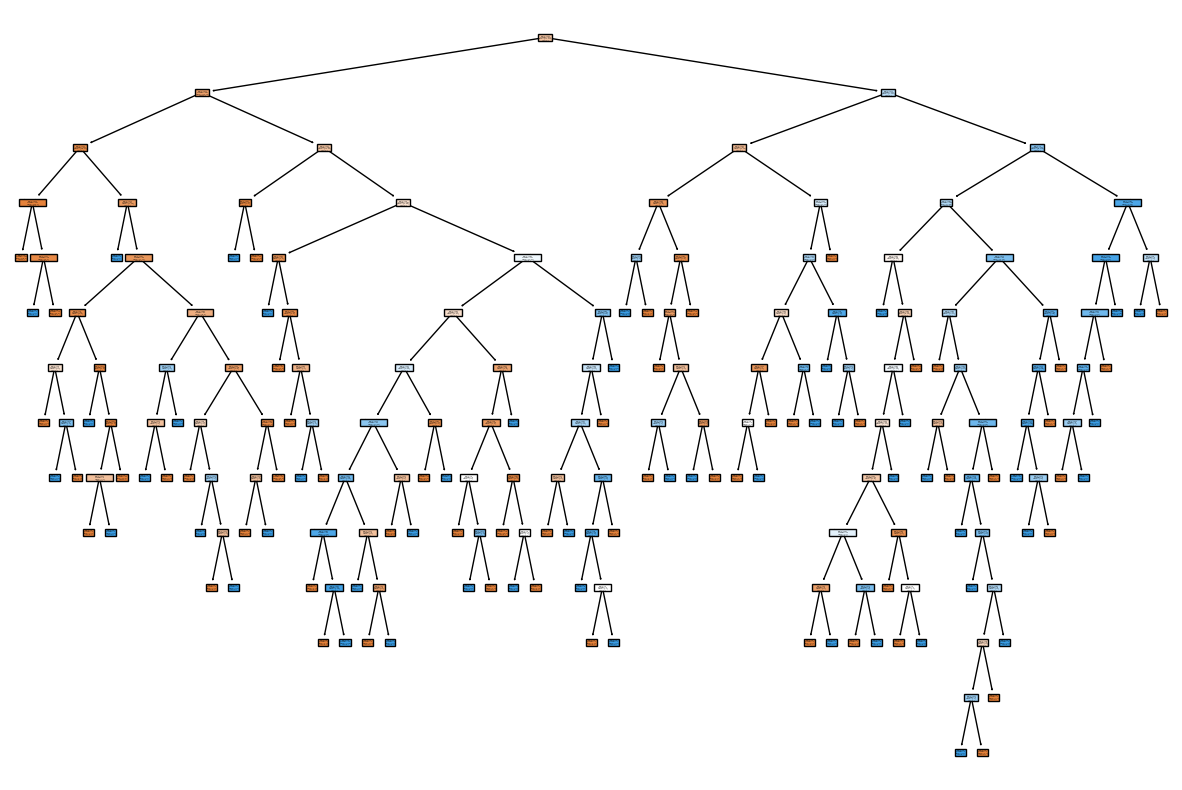

In [12]:
model_name.fit(X_train, y_train)

# Visualization of Tree Model
plt.figure(figsize=(15, 10))
tree.plot_tree(model_name, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.show()

# Prediction of the Test set
y_pred = model_name.predict(X_test)

In [13]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("Actual vs. Predicted:")
print(comparison)

# Evaluation of the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Actual vs. Predicted:
     Actual  Predicted
668       0          1
324       0          0
624       0          0
690       0          0
473       0          0
..      ...        ...
355       1          1
534       0          0
344       0          1
296       1          0
462       0          0

[154 rows x 2 columns]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Confusion Matrix:
[[75 24]
 [15 40]]


In [14]:
new_record = pd.DataFrame({'Pregnancies': [5],
                            'Glucose': [120],
                            'BloodPressure': [70],
                            'SkinThickness': [30],
                            'Insulin': [50],
                            'BMI': [25],
                            'DiabetesPedigreeFunction': [0.45],
                            'Age': [35]})
new_prediction = model_name.predict(new_record)
print("Prediction for a New Unseen Record:")
print(new_prediction)


Prediction for a New Unseen Record:
[0]
